<a href="https://colab.research.google.com/github/shasso2s/-Projekt-zur-Datenanalyse_Microbiome-Analyse-mittels-Python/blob/main/Data%20Augmentation%20technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os

import cv2

import matplotlib.pylab as plt
import os
from PIL import Image

from PIL import Image
from PIL import ImageOps
from PIL import ImageFilter


from sklearn.model_selection import train_test_split


from sklearn.utils.class_weight import compute_class_weight

import re

import random

import time
import copy

import pandas as pd

import numpy as np

import seaborn as sns
sns.set()
from os import listdir
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

In [5]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]


Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [6]:
get_label_name=metadata.features['label'].int2str

 Min and maw pixel : 0.0 1.0


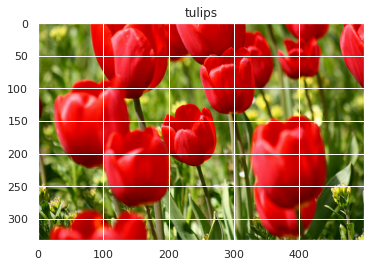

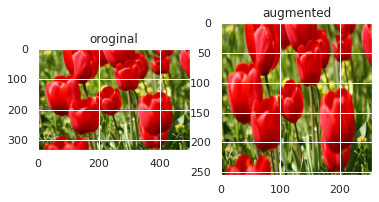

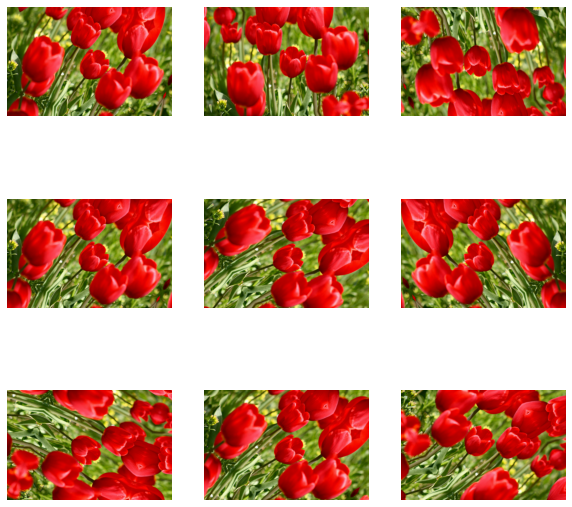

In [7]:


image, label=next(iter(train_ds))
_=plt.imshow(image)
_=plt.title(get_label_name(label))

def visualize(original , augmented):
    fig=plt.figure()
    plt.subplot(1,2,1)
    plt.title('oroginal')
    plt.imshow(original)
    
    plt.subplot(1,2,2)
    plt.title('augmented')
    plt.imshow(augmented)

flipped=tf.image.flip_left_right(image)
visualize(image,flipped)
 
img_size=256
resize_and_rescale=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(img_size,img_size),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
])

result=resize_and_rescale(image)
_=plt.imshow(result)

print(" Min and maw pixel :",result.numpy().min(),result.numpy().max())

data_augmentation=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])
image=tf.expand_dims(image,0)#.shape.as_list()
plt.figure(figsize=(10,10))

for i in range(9):
    augmented_image=data_augmentation(image)
    ax=plt.subplot(3,3,i+1)
    plt.imshow(augmented_image[0])
    plt.axis("off")
    
    
model=tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    tf.keras.layers.Conv2D(16,3,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),   
])

aug_ds=train_ds.map(lambda x,y:(resize_and_rescale(x,training=True),y))

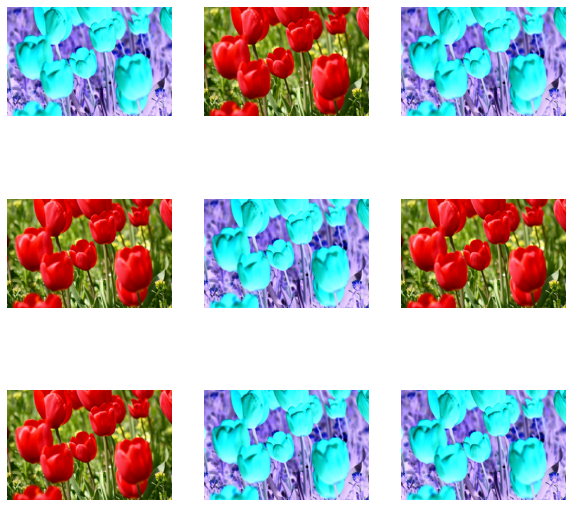

In [9]:
def random_invert_img(x, p=0.5):
    if  tf.random.uniform([]) < p:
        x = (255-x)
    else:
        x
    return x

def random_invert(factor=0.5):
    return layers.Lambda(lambda x: random_invert_img(x, factor))

random_invert = random_invert()

plt.figure(figsize=(10,10))
for i in range(9):
    augmented_image=random_invert(image)
    ax=plt.subplot(3,3,i+1)
    plt.imshow( augmented_image[0].numpy().astype("uint8"))
    plt.axis("off")
class RandomInvevert(layers.Layer):

    '''def __init __(self,factor=0.5,**kwargs):
     #   super().__init__(**kwargs)
        self.factor=factor
    def call(self,x):
        return random_invert_img(x)'''

In [ ]:
Data Augmentattion using pytorch

In [12]:
import torchvision
import torchvision.transforms as transforms
from torchvision import transforms as tr
from torchvision.transforms import Compose
import PIL
from PIL import Image

pipeline=Compose(
[tr.RandomRotation(degrees=90),
 tr.RandomRotation(degrees=270)    
])

img=PIL.Image.open('fleur.jpg', mode='r', formats=None)
augmeted_image=pipeline(img=img)

plt.imshow(augmeted_image)

TypeError: ignored

# New Section

# New Section

In [ ]:
custom data augmentation:

In [10]:
from torchvision import transforms
from torchvision.transforms import Compose as C
def aug(p=0.5):
    return C([transforms.RandomHorizontalFlip()], p=p)

class Dataloader(object):
    def __init__(self, train, csv, transform=None):
        ...
    def __getitem__(self, index):
        ...
        img = aug()(**{'image': img})['image']
        return img, target
    
    def __len__(self):
        return len(self.image_list)

trainset = Dataloader(train=True, csv='/', transform=aug)
#print(trainset.__getitem__())

In [ ]:
#augmentar 

In [11]:
import Augmentor

#p=Augmentor.Pipeline("mask/test")
#p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
#p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
#p.sample(1000)

ModuleNotFoundError: ignored

In [ ]:
import albumentations as A

In [ ]:
import cv2

def visualize(image):
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(image)
    
image=cv2.imread("fleur.jpg")
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
